In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 16
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

In [4]:
X_train_og = np.load("../input/stage-2-torgo/X_train_final.npy")
X_train_aug = np.load("../input/stage-2-torgo/X_train_aug.npy")
X_train = np.concatenate((X_train_og, X_train_aug))

Y_train_og = np.load("../input/stage-2-torgo/Y_train_final.npy")
Y_train_aug = np.load("../input/stage-2-torgo/Y_train_aug.npy")
Y_train = np.concatenate((Y_train_og, Y_train_aug))

X_test_og = np.load("../input/stage-2-torgo/X_test_final.npy")
X_test_aug = np.load("../input/stage-2-torgo/X_test_aug.npy")
X_test = np.concatenate((X_test_og, X_test_aug))

Y_test_og = np.load("../input/stage-2-torgo/Y_test_final.npy")
Y_test_aug = np.load("../input/stage-2-torgo/Y_test_aug.npy")
Y_test = np.concatenate((Y_test_og, Y_test_aug))

## Male and Dysarthric

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train = X_train.reshape(-1,1,16,8,1)
X_test = X_test.reshape(-1,1,16,8,1)

In [7]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((14692, 1, 16, 8, 1), (3674, 1, 16, 8, 1), (14692,), (3674,))

In [38]:
# X_train = np.expand_dims(X_train, axis=1)
# X_test = np.expand_dims(X_test, axis=1)

# Modelling

<img src='https://www.researchgate.net/profile/Raphael-Tang/publication/320486743/figure/fig2/AS:551064820170753@1508395499849/Convolutional-neural-network-architecture-for-keyword-spotting.png'>

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import random # for visualization
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import preprocessing
import random
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay, roc_curve, plot_roc_curve
from sklearn.metrics import *
from tensorflow.keras.metrics import *
print('Libraries Imported')

Libraries Imported


In [9]:
num_timesteps = 256 # length of sequence

cnn = Sequential()

cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(BatchNormalization())

cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(BatchNormalization())

cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D((2,2), padding='same'))
cnn.add(BatchNormalization())

cnn.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D((2,2), padding='same'))
cnn.add(BatchNormalization())

cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Dense(256, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

#LSTM
model = Sequential()
model.add(TimeDistributed(cnn, input_shape=(num_timesteps, 16, 8,1)))
model.add(LSTM(num_timesteps, return_sequences=True))
# model.add(LSTM(num_timesteps))

model.add(Dense(1, activation='sigmoid'))

2022-08-25 16:35:19.747773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 16:35:19.882196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 16:35:19.883029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 16:35:19.884846: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 256, 256)          2742272   
_________________________________________________________________
lstm (LSTM)                  (None, 256, 256)          525312    
_________________________________________________________________
dense_3 (Dense)              (None, 256, 1)            257       
Total params: 3,267,841
Trainable params: 3,262,337
Non-trainable params: 5,504
_________________________________________________________________


In [43]:
# model = Sequential([
#     InputLayer(input_shape=(16, 8, 1)),
#     Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = "same"),
#     MaxPooling2D(2, 2),
#     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = "same"),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])


# model.summary()

In [44]:
X_train.shape

(7346, 1, 16, 8, 1)

In [11]:
model_name = "cnn_lstm_stage2.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 30, verbose = 1, restore_best_weights=True)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, Y_train, epochs=1200, validation_split=0.1, callbacks=[checkpoint,earlystopping])

2022-08-25 16:36:29.742078: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1200


2022-08-25 16:36:33.591416: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


414/414 [==============================] - 15s 11ms/step - loss: 0.1759 - accuracy: 0.9318 - val_loss: 0.1105 - val_accuracy: 0.9551

Epoch 00001: val_accuracy improved from -inf to 0.95510, saving model to cnn_lstm_stage2.h5
Epoch 2/1200
414/414 [==============================] - 4s 10ms/step - loss: 0.0815 - accuracy: 0.9717 - val_loss: 0.3428 - val_accuracy: 0.8952

Epoch 00002: val_accuracy did not improve from 0.95510
Epoch 3/1200
414/414 [==============================] - 4s 10ms/step - loss: 0.0681 - accuracy: 0.9747 - val_loss: 0.1427 - val_accuracy: 0.9388

Epoch 00003: val_accuracy did not improve from 0.95510
Epoch 4/1200
414/414 [==============================] - 4s 10ms/step - loss: 0.0522 - accuracy: 0.9808 - val_loss: 0.1761 - val_accuracy: 0.9415

Epoch 00004: val_accuracy did not improve from 0.95510
Epoch 5/1200
414/414 [==============================] - 5s 11ms/step - loss: 0.0431 - accuracy: 0.9841 - val_loss: 0.0326 - val_accuracy: 0.9912

Epoch 00005: val_accuracy

# Model Summary


## Learning Curves

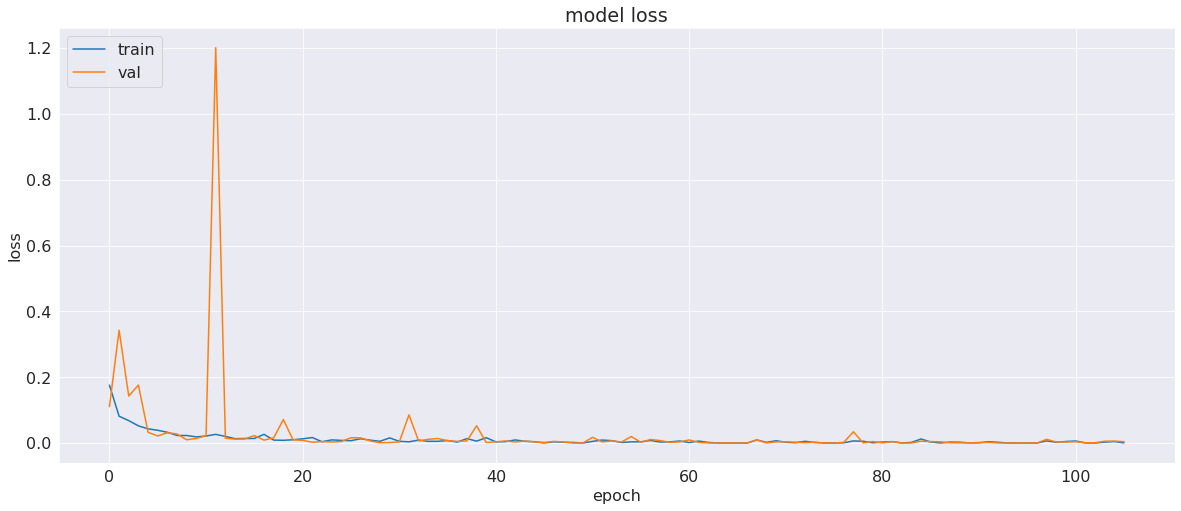

In [19]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

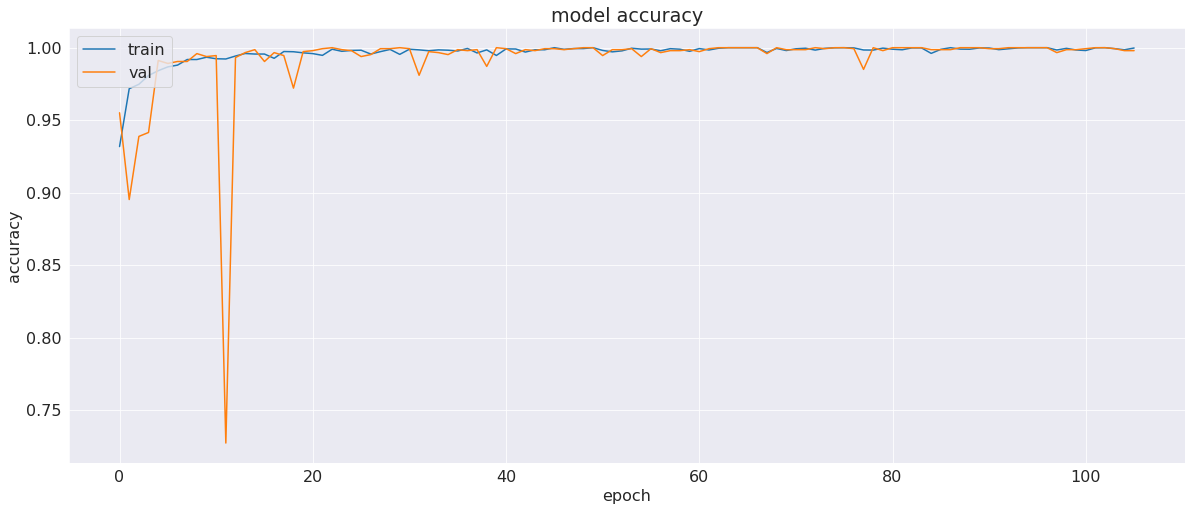

In [15]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
y_pred = model.predict(X_test)

In [26]:
print(model.evaluate(X_test, Y_test))

115/115 [==============================] - 0s 4ms/step - loss: 0.0326 - accuracy: 0.9959
[0.032626889646053314, 0.9959172606468201]


In [18]:
y_pred.shape

(3674, 1, 1)

In [20]:
y_pred = y_pred.reshape(3674,)

## ROC Curve and AUC Score
- AUC provides an aggregate measure of performance across all possible classification thresholds. The current model is giving us an AUC score of 99%, which means that our model is doing a great job. Since it is extremely close to 1, our model has a very good separability for dysarthric and non dysarthric cases
- The ROC curve is also giving us a good indication that this model will perform well with the threshold of 0.5

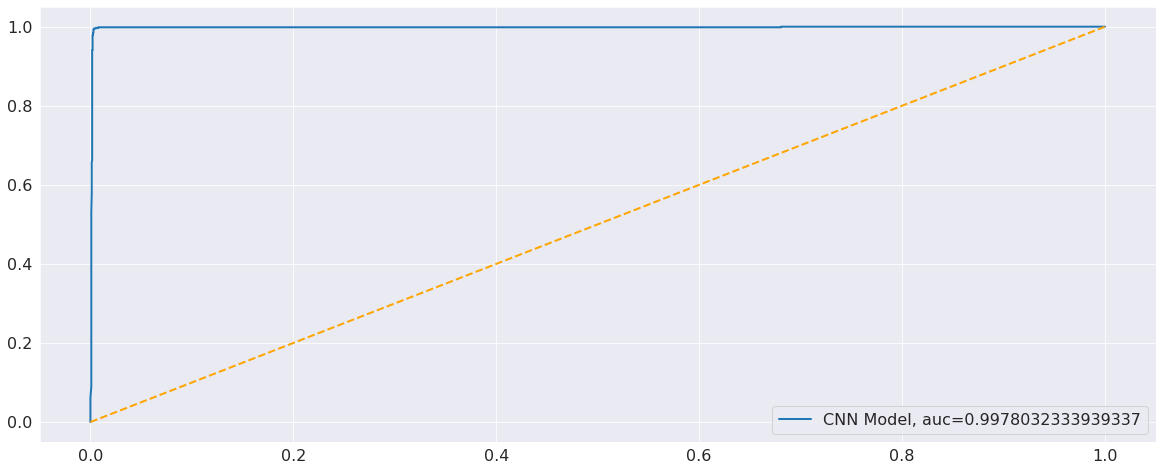

In [22]:
plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(Y_test,  y_pred)
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="CNN Model, auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

In [23]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

## Confusion Matrix
- Only 1 misclassification from each class is observed
- Upon running the model several times the performance still remains the same

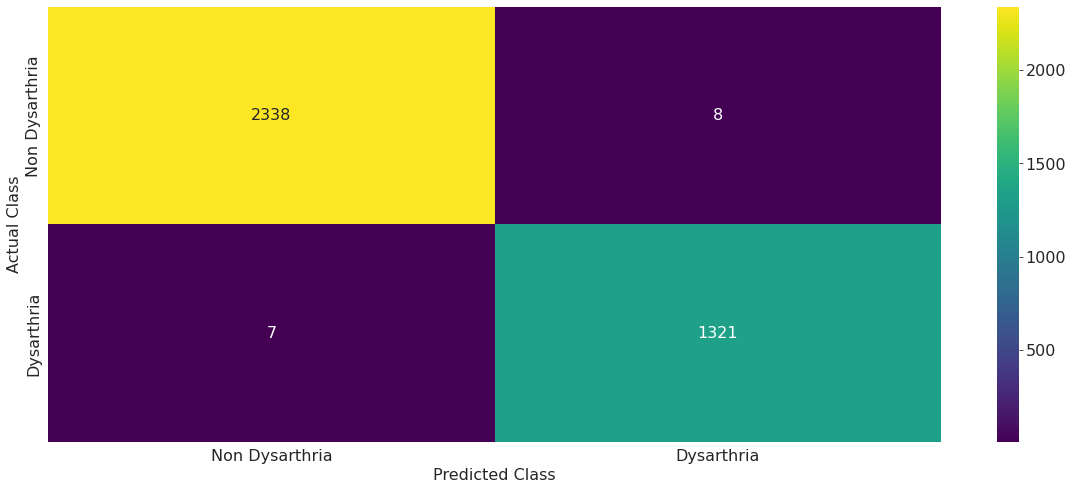

In [25]:
sns.heatmap(confusion_matrix(Y_test, y_pred),cmap='viridis',annot=True,fmt='g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Classification Report
- Since this is a problem linked to medical domain, it is important that we consider the **Recall** score
- Recall is the measure of what proportion of actual positives were correctly classified, as we do not want to misclassify a dysarthric patient as non dysarthric

<img src='https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png'>

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1172
         1.0       1.00      1.00      1.00       665

    accuracy                           1.00      1837
   macro avg       1.00      1.00      1.00      1837
weighted avg       1.00      1.00      1.00      1837



In [61]:
print("Recall Score of the Model: ",recall_score(y_test,y_pred))

Recall Score of the Model:  0.9954887218045113


<div style='font-size: 18px'><strong>Conclusion:</strong> Since the Recall is 99% we can rest assured that our model is doing a good job. An overenthusiastic approach would be to try and make this score 100% to avoid any grave misclassifications<div>